In [1]:
from vcat import ImageData, ImageCube
from vcat.graph_generator import KinematicPlot

Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....



Image of the source 3C111 at frequency 15.2 GHz on 2014-05-08 
    Total cleaned flux: 3474.345 mJy 
    Image Noise: 0.252 mJy using method 'Histogram Fit'
No polarization data loaded.
Model information: 
    Model Flux: 3472.457 mJy 
    Number of Components: 12


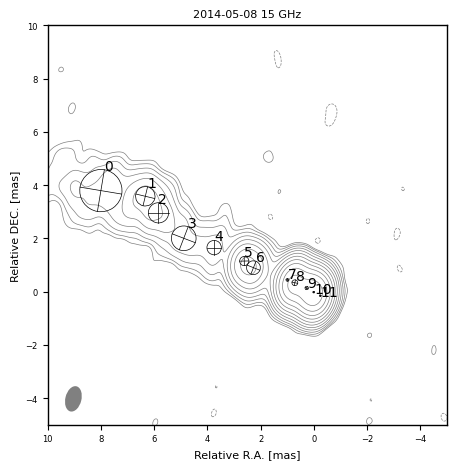

In [2]:
#Let's load an image with modelfit first
dataU=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits",
       model="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.mfit") #this can be either .fits or .mod file

#let's print some info and plot it with the modelcomps and automatically associated ids
print(dataU)
dataU.plot(overplot_gauss=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

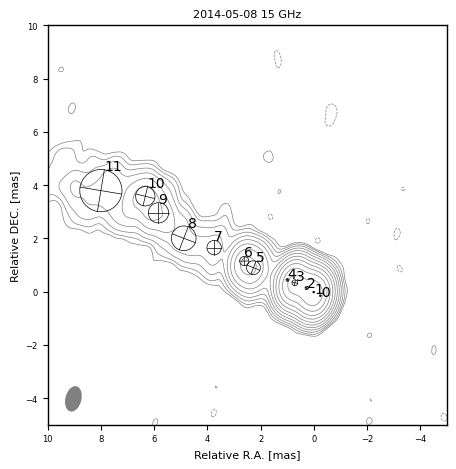

In [3]:
#Let's modify the component IDs and assign them to our liking.
#Let's first use a list of the old comp_ids
old_ids=[0,1,2,3,4,5,6,7,8,9,10,11]

#and now the new IDs that we want to assign them
new_ids=[11,10,9,8,7,6,5,4,3,2,1,0]

#and finally execute the change
dataU.change_component_ids(old_ids,new_ids)

#we also want to assign the core component to be comp 1
dataU.set_core_component(1)

#let's plot it again
dataU.plot(overplot_gauss=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

In [4]:
#Let's check if the core assignment worked   
print(dataU.get_core_component())

Component with ID 1 at frequency 15.2 GHz
x: 0.00mas, y:-0.02mas
Maj: 0.06mas, Min: 0.06, PA: -141.33999633789062°
Flux: 0.8844209909439087 Jy, Distance to Core: 0.00 mas



In [5]:
#Similarly we can get info about any other component 
print(dataU.get_component(10))

Component with ID 10 at frequency 15.2 GHz
x: 6.33mas, y:3.58mas
Maj: 0.73mas, Min: 0.73, PA: -13.495699882507324°
Flux: 0.059241000562906265 Jy, Distance to Core: 7.28 mas



In [6]:
#Let's load some more data
dataC=ImageData("../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.fits",
        model="../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.mfit")
dataQ=ImageData("../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.fits",
        model="../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.mfit")
dataW=ImageData("../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.fits",
        model="../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.mfit")
dataX=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
        model="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.mfit")

#Now we have to manually associate the components to the right ID, this is a bit tedious and will soon be replaced with a GUI version
#For now, let's use the following associations:

old_ids=[]
new_ids=[]
core_id=0

dataQ.change_component_ids(old_ids,new_ids)
dataQ.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=0

dataW.change_component_ids(old_ids,new_ids)
dataW.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=4

dataX.change_component_ids(old_ids,new_ids)
dataX.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=6

dataC.change_component_ids(old_ids,new_ids)
dataC.set_core_component(core_id)

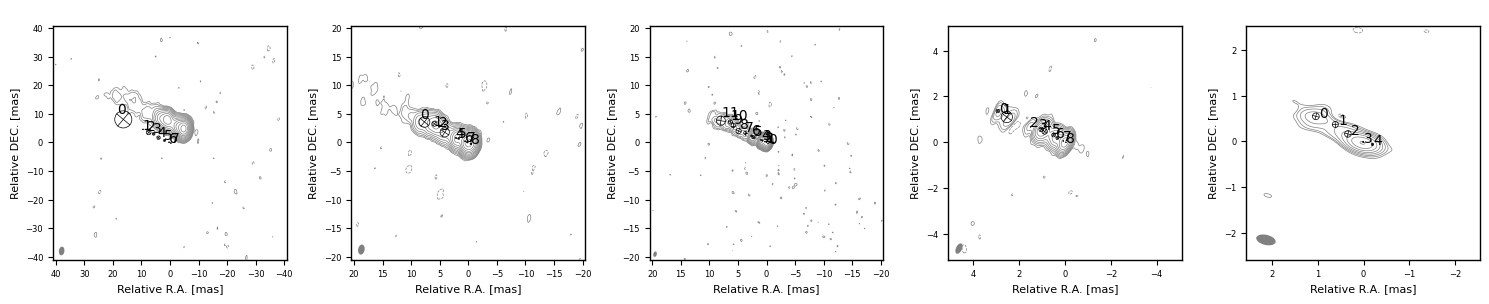

In [7]:
#Now that all components were correctly identified, we will load the images as an ImageCube for easier handling
im_cube=ImageCube([dataC,dataX,dataU,dataQ,dataW])

#let's double check the associations
im_cube.plot(overplot_gauss=True,plot_comp_ids=True)

Fit component spectrum
Fit Powerlaw to Comp1
fit_type=2
Beta: [0.01464061 0.24561745]
Beta Std Error: [0.01596209 0.31833935]
Beta Covariance: [[ 9.69205973e-06 -1.77759359e-04]
 [-1.77759359e-04  3.85493759e-03]]
Residual Variance: 26.288347977464714
Inverse Condition #: 0.019173820940794555
Reason(s) for Halting:
  Sum of squares convergence
Fit SSA to Comp 1
fit_type=2
Beta: [14.56959837  0.18417954 -1.24837639]
Beta Std Error: [4.43204068 0.23236481 1.43866397]
Beta Covariance: [[ 0.91709073  0.03858178 -0.2348349 ]
 [ 0.03858178  0.00252084 -0.01496512]
 [-0.2348349  -0.01496512  0.09663258]]
Residual Variance: 21.418801925282686
Inverse Condition #: 0.04292401934132739
Reason(s) for Halting:
  Sum of squares convergence
ssa spectrum fits better
Uncertainties for SN fit large, limit peak flux and freq 


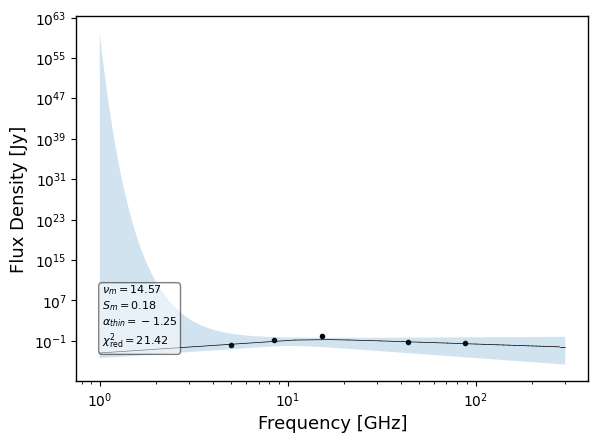

{'fit': 'SN',
 'athin': -1.2483763902170963,
 'athinE': 1.4386639665648215,
 'athick': 2.5,
 'athickE': 0.0,
 'num': 14.56959837225006,
 'Sm': 0.18417954475289883,
 'chi2': 21.418801925282686,
 'SmE': 0.23236480573326637,
 'numE': 4.432040680557547,
 'fit_free_ssa': False,
 'sn_p': array([14.56959837,  0.18417954, -1.24837639]),
 'sn_sd': array([4.43204068, 0.23236481, 1.43866397])}

In [8]:
#That looks good, let's see if we can fit a component spectrum to specific components
#We can call this directly on the image cube
comp_id=1
im_cube.fit_comp_spectrum(comp_id,plot=True)

Fitted k_r: 6538.077558289968
Fitted r0: 6296934.28552115


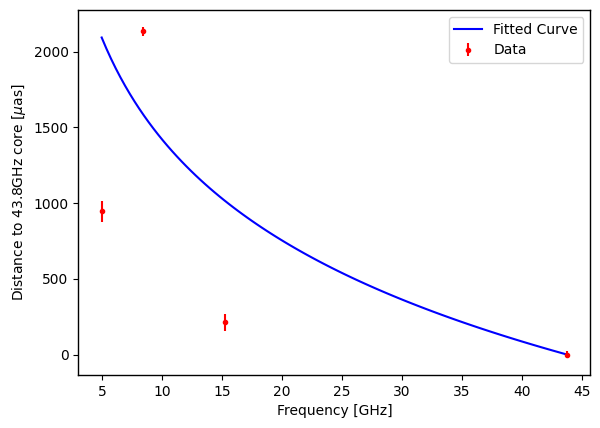

{'k_r': 6538.077558289968,
 'r0': 6296934.28552115,
 'ref_freq': 43.787875,
 'freqs': array([ 4.979875,  8.415875, 15.247875, 43.787875]),
 'coreshifts': [945.9270920198579, 2133.971268805829, 212.7277288098055, 0.0],
 'coreshift_err': [67.62226355492339,
  32.84715916893001,
  54.2743375598924,
  23.390950461690913]}

In [9]:
#In addition to the component spectrum, we can also derive the core shift, based on a given component
im_cube.fit_coreshift(5,plot=True)

In [10]:
#So far we have looked at a single-epoch multi-frequency dataset
#Let's also have a look at a single-frequency multi-epoch dataset